In [1]:
from torchvision import models

In [2]:
dir(models) 
# See pretrained models available
# Name with upper case are classes, name without upper case are shortcut to create predefined version of models from the class (i.e. resnet101 create 101 layer version of ResNet class)

['AlexNet',
 'DenseNet',
 'GoogLeNet',
 'GoogLeNetOutputs',
 'Inception3',
 'InceptionOutputs',
 'MNASNet',
 'MobileNetV2',
 'ResNet',
 'ShuffleNetV2',
 'SqueezeNet',
 'VGG',
 '_GoogLeNetOutputs',
 '_InceptionOutputs',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '_utils',
 'alexnet',
 'densenet',
 'densenet121',
 'densenet161',
 'densenet169',
 'densenet201',
 'detection',
 'googlenet',
 'inception',
 'inception_v3',
 'mnasnet',
 'mnasnet0_5',
 'mnasnet0_75',
 'mnasnet1_0',
 'mnasnet1_3',
 'mobilenet',
 'mobilenet_v2',
 'quantization',
 'resnet',
 'resnet101',
 'resnet152',
 'resnet18',
 'resnet34',
 'resnet50',
 'resnext101_32x8d',
 'resnext50_32x4d',
 'segmentation',
 'shufflenet_v2_x0_5',
 'shufflenet_v2_x1_0',
 'shufflenet_v2_x1_5',
 'shufflenet_v2_x2_0',
 'shufflenetv2',
 'squeezenet',
 'squeezenet1_0',
 'squeezenet1_1',
 'utils',
 'vgg',
 'vgg11',
 'vgg11_bn',
 'vgg13',
 'vgg13_bn',
 'vgg16',
 'vg

In [3]:
alex = models.AlexNet()

In [4]:
resnet = models.resnet101(pretrained=True)

Downloading: "https://download.pytorch.org/models/resnet101-5d3b4d8f.pth" to C:\Users\raymo/.cache\torch\checkpoints\resnet101-5d3b4d8f.pth
100%|██████████| 170M/170M [00:05<00:00, 30.2MB/s]


In [5]:
resnet

 track_running_stats=True)
      )
    )
    (1): Bottleneck(
      (conv1): Conv2d(256, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
    )
    (2): Bottleneck(
      (conv1): Conv2d(256, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stat

In [6]:
from torchvision import transforms
preprocess = transforms.Compose([
    transforms.Resize(256), # input image 256x256
    transforms.CenterCrop(224), # crop around center 224x224
    transforms.ToTensor(), # convert to Tensor
    transforms.Normalize( # Normalize RGB components
        mean=[0.485,0.456,0.406],
        std=[0.229,0.224,0.225]
    )
])

In [21]:
from PIL import Image
img = Image.open("D:\\OneDrive\\Pictures\\doggy.jpg")

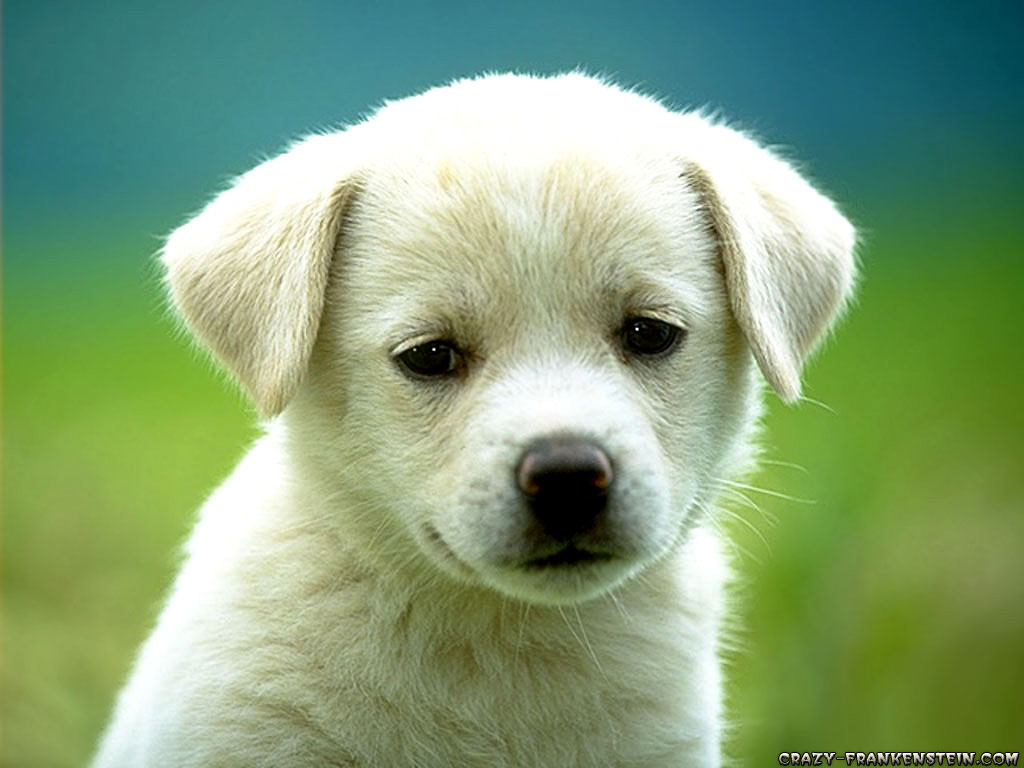

In [22]:
img

In [23]:
img.show() # pop up viewer

In [24]:
img_t = preprocess(img) # _t indicates tensor, preprocess the image

In [25]:
img_t.shape

torch.Size([3, 224, 224])

In [26]:
import torch
batch_t = torch.unsqueeze(img_t, 0) # Add one dimension for batch size
batch_t.shape

torch.Size([1, 3, 224, 224])

In [28]:
resnet.eval() # Set to eval mode for inference

 track_running_stats=True)
      )
    )
    (1): Bottleneck(
      (conv1): Conv2d(256, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
    )
    (2): Bottleneck(
      (conv1): Conv2d(256, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stat

In [29]:
out = resnet(batch_t) # forward pass or inference

In [30]:
out # Probability score for each of the 1000 classes in imagenet, highest score = predicted label

tensor([[ 1.4280e+00,  4.8126e-01, -9.1110e-01, -3.0397e+00, -9.6855e-01,
          9.3276e-01, -1.3291e+00, -2.3569e+00, -1.0434e+00, -3.6918e+00,
         -3.1151e+00, -1.4257e+00, -2.5956e+00, -3.0699e+00,  3.3950e-01,
         -4.5464e+00, -2.0849e+00,  3.6033e-01, -1.8091e+00, -9.1267e-01,
         -3.4294e+00, -1.9610e+00, -2.2456e+00, -3.8761e-01, -2.7624e+00,
          2.7696e-01, -4.3852e-01,  1.9120e-01,  3.7582e-01,  8.8905e-01,
         -7.3329e-01, -4.9942e-01, -9.8393e-01, -1.1258e+00, -9.1863e-01,
         -2.2736e+00, -1.0604e+00, -1.0448e+00, -8.7985e-01, -4.6672e-01,
          2.3133e+00, -1.6164e+00, -6.3133e-01, -3.1488e+00,  9.0089e-01,
         -7.9359e-01,  3.4222e+00,  1.5221e+00, -2.3262e+00, -2.7307e+00,
         -1.9201e+00, -5.8283e-01,  4.8324e-01, -2.2739e+00, -1.9800e+00,
          5.4788e-01, -2.1400e+00, -8.0493e-01, -1.9509e+00, -1.1003e+00,
         -8.5067e-01, -2.1218e+00, -2.6490e+00, -5.3878e-01,  1.0288e+00,
         -4.3032e-01, -2.9275e+00, -1.

In [32]:
with open('imagenet_classes.txt') as f:
    labels = [line.strip() for line in f.readlines()]

In [33]:
labels

['0, tench',
 '1, goldfish',
 '2, great_white_shark',
 '3, tiger_shark',
 '4, hammerhead',
 '5, electric_ray',
 '6, stingray',
 '7, cock',
 '8, hen',
 '9, ostrich',
 '10, brambling',
 '11, goldfinch',
 '12, house_finch',
 '13, junco',
 '14, indigo_bunting',
 '15, robin',
 '16, bulbul',
 '17, jay',
 '18, magpie',
 '19, chickadee',
 '20, water_ouzel',
 '21, kite',
 '22, bald_eagle',
 '23, vulture',
 '24, great_grey_owl',
 '25, European_fire_salamander',
 '26, common_newt',
 '27, eft',
 '28, spotted_salamander',
 '29, axolotl',
 '30, bullfrog',
 '31, tree_frog',
 '32, tailed_frog',
 '33, loggerhead',
 '34, leatherback_turtle',
 '35, mud_turtle',
 '36, terrapin',
 '37, box_turtle',
 '38, banded_gecko',
 '39, common_iguana',
 '40, American_chameleon',
 '41, whiptail',
 '42, agama',
 '43, frilled_lizard',
 '44, alligator_lizard',
 '45, Gila_monster',
 '46, green_lizard',
 '47, African_chameleon',
 '48, Komodo_dragon',
 '49, African_crocodile',
 '50, American_alligator',
 '51, triceratops',
 

In [34]:
_, index = torch.max(out, 1) # Find the indices of the max value

In [42]:
index # not a float index, but a one element one dimension tensor

tensor([208])

In [43]:
index[0]

tensor(208)

In [44]:
index[0].item()

208

In [46]:
percentage = torch.nn.functional.softmax(out, dim=1)[0] * 100 # Softmax normalize output to range [0,1] divide by sum
labels[index[0]], percentage[index[0]].item()

('208, Labrador_retriever', 57.510597229003906)

In [47]:
_, indices = torch.sort(out, descending=True)
[(labels[idx], percentage[idx].item()) for idx in indices[0][:5]] # find top 5

[('208, Labrador_retriever', 57.510597229003906),
 ('222, kuvasz', 19.187950134277344),
 ('207, golden_retriever', 8.39715576171875),
 ('257, Great_Pyrenees', 2.6658241748809814),
 ('852, tennis_ball', 2.525446653366089)]